# Assignment 2
Still working on the one-dimensional Ising chain in equilibrium with a heat bath at temperature $T$, but this time also in the presence of an external magnetic field $H$.
* Compute the mean magnetization of the Ising chain as a function of applied magnetic field and compare it with the analytic result. Repeat the analysis for at least two different temperatures.
* Implement the calculation of the magnetic susceptibility $\chi(T)$ by exploiting its definition in terms of the variance of the magnetization. Compare the computed values with the analytic results for a range of magnetic fiels.

Import useful modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
#style.use('dark_background') # comment this out if you are not using the dark background

Define a few functions that will be used in the importance sampling Monte Carlo simulation.
- initial: performs the initialization of the system
- energy: compute the energy of the system
- flip_spin: flips a random spin in the system
- montecarlo: performs importance sampling Monte Carlo for a give number of steps

In [2]:
def initial(init,N):
    # initial configurations
    if init == 'up':
        s = np.ones(N)
    elif init == 'down':
        s = -np.ones(N)
    elif init == 'random':
        s = np.random.randint(0,2,N)*2 -1
    else:
        print('wrong initial conditions')
    return s

In [3]:
def energy(s,J,B):
    # compute the configurational energy of the spin chain
    e = -J*s.dot(np.roll(s,-1))-B*np.sum(s)
    return e

In [4]:
def flip_spin(s):	
    # generate spin chain by flipping one spin at a time
    index=np.random.randint(0,len(s))
    s[index] *= -1
    return s

In [17]:
def analytic_magnetization(N,J,T,B_max,n_fields):
    # analytic magnetization of Ising chain for a range of magnetic fields
    fields=np.linspace(B_max,0,n_fields+1)
    return fields,np.sinh(fields/T)/np.sqrt(np.sinh(fields/T)**2+np.exp(-4*J/T))

def analytic_susceptibility(N,J,T,B_max,n_fields):
    # analytic susceptibility of Ising chain for a range of magnetic fields
    fields=np.linspace(B_max,0,n_fields+1)
    return fields, N/(T) * np.exp(-4*J/T) * np.cosh(fields/T) / (np.sinh(fields/T)**2 + np.exp(-4*J/T))**(3/2)

In [6]:
def montecarlo(s,J,B,T,N,n_steps):
    # importance sampling Monte Carlo algorithm
    #
    # initialize arrays to store results of simulation
    #
    energies = np.zeros(n_steps) # hold the total energy along the MC run
    magnetizations = np.zeros(n_steps) # hold the mean magnetization along the MC run
    microstates = np.zeros((n_steps,N)) # hold the actual states along the MC run
    #
    # set results of first configuration
    #
    energies[0]=energy(s,J,B)
    magnetizations[0]=np.sum(s)/N
    microstates[0, :]=s[:]
    #
    for i in range(1,n_steps):
        new_s = s.copy() # trial step is a copy of the current state
        new_s = flip_spin(new_s) # but with one random spin flipped
        #
        # Compute the Boltzmann factor 
        #
        new_energy=energy(new_s,J,B)
        old_energy=energies[i-1]
        boltzmann_factor = np.exp((old_energy-new_energy)/T)
        r = np.random.random()
        if r < min(1,boltzmann_factor) :
        # if the random number is lower than the boltzman factor
        # or the energy decreases, accept the trial move
            s = new_s.copy()
            energies[i]=new_energy
            magnetizations[i]=np.sum(s)/N
            microstates[i, :]=s[:]
        else:
        # otherwise, keep the old state
            energies[i]=old_energy
            magnetizations[i]=magnetizations[i-1]
            microstates[i, :]=s[:]
    return energies, magnetizations, microstates

Compute the average energy as a function of applied magnetic field.

In [7]:
# global simulation setup
#
N = 100
J = 1.0 # Arbitrary units (kb=1.0)
T = 4.0
n_steps=10000 # NOTE: this number can be increased to improve the accuracy of the calculations
n_equilibration=500 # NOTE: this number needs to be changed, use the number that you estimated previously
#
# setting up the range of temperatures
#
n_fields = 50
B_max = 1.
B_min = 0.
#
# initializing the arrays that will hold the results
#
fields=np.zeros(n_fields)
mean_magnetizations=np.zeros(n_fields)
susceptibility = np.zeros(n_fields)
#
s = initial('random',N)
for i,B in enumerate(np.linspace(B_min,B_max,n_fields)):
    energies,magnetizations,microstates = montecarlo(s,J,B,T,N,n_steps)
    fields[i]=B
    susceptibility[i] = np.var(magnetizations[n_equilibration:])
    mean_magnetizations[i]=np.average(magnetizations[n_equilibration:])
    s=microstates[-1,:].copy() # the next simulation restarts from the last configuration of the current one

EDIT: Compare the numerical and analytical results of the case T = 4.

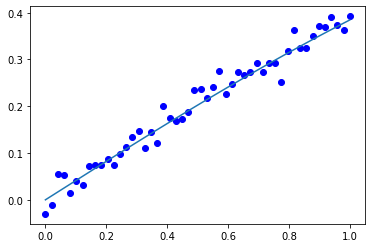

In [8]:
plt.plot(fields,mean_magnetizations,'bo')
plt.plot(analytic_magnetization(N,J,T,B_max,n_fields)[0],analytic_magnetization(N,J,T,B_max,n_fields)[1])
plt.show()

EDIT: Compare the analytic solution of susceptibility vs variance of the magnetization for the case T = 4. The analytic and simulation values do not match up.

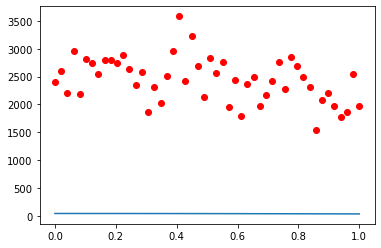

In [19]:
plt.plot(fields,susceptibility*T**2 * N**2,'ro')
plt.plot(analytic_susceptibility(N,J,T,B_max,n_fields)[0],analytic_susceptibility(N,J,T,B_max,n_fields)[1])

EDIT: Compare the numerical and analytical results of the case T = 0.4

In [49]:
T = 0.4

fields=np.zeros(n_fields)
mean_magnetizations=np.zeros(n_fields)
#
s = initial('random',N)
for i,B in enumerate(np.linspace(B_min,B_max,n_fields)):
    energies,magnetizations,microstates = montecarlo(s,J,B,T,N,n_steps)
    fields[i]=B
    susceptibility[i] = np.var(magnetizations[n_equilibration:])
    mean_magnetizations[i]=np.average(magnetizations[n_equilibration:])
    s=microstates[-1,:].copy() # the next simulation restarts from the last configuration of the current one

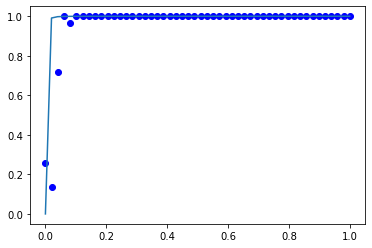

In [50]:
plt.plot(fields,mean_magnetizations,'bo')
plt.plot(analytic_magnetization(N,J,T,B_max,n_fields)[0],analytic_magnetization(N,J,T,B_max,n_fields)[1])
plt.show()

(-0.01, 0.1)

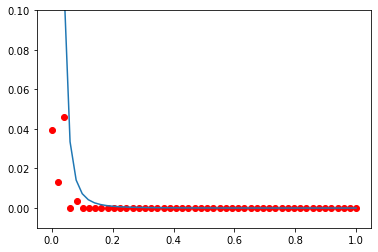

In [56]:
plt.plot(fields,susceptibility,'ro')
plt.plot(analytic_susceptibility(N,J,T,B_max,n_fields)[0],analytic_susceptibility(N,J,T,B_max,n_fields)[1])
plt.ylim([-0.01,0.1])